In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import math




def read_topology_file(file_path):
    # Create an empty graph
    G = nx.Graph()

    # Read the topology file line by line
    with open(file_path, 'r') as file:
        next(file)  # Skip the header line
        for line in file:
            # Split the line into fields
            fields = line.strip().split()

            # Extract relevant information
            node_a = int(fields[3])
            node_b = int(fields[4])
            length = int(fields[5])

            # Add an edge to the graph with the nodes and length
            G.add_edge(node_a, node_b, length=length)

    return G

def plot_topology(graph):
    pos = nx.spring_layout(graph,seed=1)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_size=700)

    # Draw edges
    nx.draw_networkx_edges(graph, pos, width=2)

    # Draw labels
    nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(graph, 'length')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    plt.axis("off")
    plt.show()


# Example usage:
file_path = 'Germany-7nodes\G7-topology.txt'  # Replace 'topology.txt' with the actual file path
topology_graph = read_topology_file(file_path)
#plot_topology(topology_graph)
# Print basic information about the graph
print("Number of nodes:", topology_graph.number_of_nodes())
print("Number of edges:", topology_graph.number_of_edges())


Number of nodes: 7
Number of edges: 11


In [21]:
def read_traffic_request(file_path):
    traffic_matrix = []
    
    with open(file_path, 'r') as file:
        for line in file:
            row = list(map(int, line.strip().split()))
            traffic_matrix.append(row)
    
    return traffic_matrix

# Example usage:
file_path = 'Germany-7nodes\G7-matrix-1.txt'  # Replace 'traffic_request.txt' with the actual file path
traffic_matrix = read_traffic_request(file_path)

# Print the traffic matrix
for row in traffic_matrix:
    print(row)


[0, 7, 10, 11, 0, 29, 18]
[14, 0, 15, 28, 17, 8, 10]
[0, 12, 0, 1, 12, 1, 5]
[11, 16, 33, 0, 8, 8, 20]
[6, 22, 13, 14, 0, 8, 9]
[0, 29, 6, 16, 15, 0, 19]
[28, 10, 8, 33, 1, 6, 0]


In [22]:
def calculate_k_shortest_paths(graph, source, target, k):
    return list(nx.shortest_simple_paths(graph, source, target, weight='length'))[:k]

k=5
# Calculate k shortest paths for each traffic request
for i in range(len(traffic_matrix)):
    for j in range(len(traffic_matrix[i])):
        if traffic_matrix[i][j] != 0:
            source = i + 1  # Assuming 1-based indexing
            target = j + 1  # Assuming 1-based indexing
            k_shortest_paths = calculate_k_shortest_paths(topology_graph, source, target, k)
            print(f"Shortest paths from node {source} to node {target}:")
            for idx, path in enumerate(k_shortest_paths):
                print(f"Path {idx + 1}: {path}")

Shortest paths from node 1 to node 2:
Path 1: [1, 2]
Path 2: [1, 3, 2]
Path 3: [1, 3, 4, 2]
Path 4: [1, 3, 5, 4, 2]
Path 5: [1, 3, 6, 5, 4, 2]
Shortest paths from node 1 to node 3:
Path 1: [1, 3]
Path 2: [1, 2, 3]
Path 3: [1, 2, 4, 3]
Path 4: [1, 2, 4, 5, 3]
Path 5: [1, 2, 4, 5, 6, 3]
Shortest paths from node 1 to node 4:
Path 1: [1, 3, 4]
Path 2: [1, 2, 4]
Path 3: [1, 3, 5, 4]
Path 4: [1, 2, 3, 4]
Path 5: [1, 3, 2, 4]
Shortest paths from node 1 to node 6:
Path 1: [1, 3, 6]
Path 2: [1, 2, 3, 6]
Path 3: [1, 3, 5, 6]
Path 4: [1, 3, 5, 7, 6]
Path 5: [1, 2, 3, 5, 6]
Shortest paths from node 1 to node 7:
Path 1: [1, 3, 5, 7]
Path 2: [1, 3, 6, 7]
Path 3: [1, 2, 3, 5, 7]
Path 4: [1, 2, 3, 6, 7]
Path 5: [1, 3, 4, 5, 7]
Shortest paths from node 2 to node 1:
Path 1: [2, 1]
Path 2: [2, 3, 1]
Path 3: [2, 4, 3, 1]
Path 4: [2, 4, 5, 3, 1]
Path 5: [2, 4, 5, 6, 3, 1]
Shortest paths from node 2 to node 3:
Path 1: [2, 3]
Path 2: [2, 1, 3]
Path 3: [2, 4, 3]
Path 4: [2, 4, 5, 3]
Path 5: [2, 4, 5, 6, 3]
Sh

In [23]:
# Define modulation format options and their parameters
modulation_formats = {
    'SC-DP-QPSK': {'line_rate': 100, 'channel_bandwidth': 37.5, 'max_length': 2000, 'transponder_cost': 1.5},
    'DP-QPSK': {'line_rate': 200, 'channel_bandwidth': 37.5, 'max_length': 700, 'transponder_cost': 2},
    'DP-16QAM':{'line_rate': 400, 'channel_bandwidth': 75, 'max_length': 500, 'transponder_cost': 3.7}
}



def assign_modulation_format(shortest_path, graph_dict, modulation_formats, traffic_request):
    assigned_modulation_formats = []
    total_length=0
    for i in range(len(shortest_path) - 1):
        node_a = shortest_path[i]
        node_b = shortest_path[i + 1]
        if node_a in graph_dict and node_b in graph_dict[node_a]:
            length = graph_dict[node_a][node_b]['length']
            total_length += length  # Add the length of the current edge to total length
        else:
            raise Exception(f"Edge ({node_a}, {node_b}) does not exist in the graph.")
    
            
    feasible_formats = []
        
    for format_name, params in modulation_formats.items():
        if total_length <= params['max_length']:
            #print(total_length)
            num_links_required = math.ceil(traffic_request * 10 / params['line_rate'])
            # Calculate the cost for the modulation format considering the number of links required
            total_cost = num_links_required * params['transponder_cost']
            feasible_formats.append((format_name, total_cost,num_links_required))
    if not feasible_formats:
        raise Exception(f"No feasible modulation format for link ({node_a}, {node_b})")
    
    # Select the format with minimum cost
    selected_format, min_cost,num_links = min(feasible_formats, key=lambda x: x[1])
    assigned_modulation_formats.append((shortest_path, selected_format,min_cost,num_links))
    
            # Handle this case as needed
    return assigned_modulation_formats


# Example usage:
assigned_formats_matrix = []
for i in range(len(traffic_matrix)):
    for j in range(len(traffic_matrix[i])):
        if traffic_matrix[i][j] != 0:
            source = i + 1  # Assuming 1-based indexing
            target = j + 1  # Assuming 1-based indexing
            traffic_request = traffic_matrix[i][j]  # Get traffic request from the matrix
            shortest_paths = calculate_k_shortest_paths(topology_graph, source, target, k)
            min_cost = float('inf')
            best_path = None
            best_modulation = None
            for path in shortest_paths:
                #print(path)
                assigned_formats = assign_modulation_format(path,topology_graph, modulation_formats, traffic_request)
                for path, _, cost,link in assigned_formats:
                    if cost < min_cost:
                        min_cost = cost
                        best_path = path
                        best_modulation = _
                        best_link=link
            assigned_formats_matrix.append((i, j, best_path, best_modulation,best_link))

# Print the assigned formats for each traffic request
for i, j, path, modulation,link in assigned_formats_matrix:
    print(f"Traffic request ({i+1}, {j+1}):")
    print("Shortest path:", path)
    print("Assigned modulation formats:", modulation)
    #print("used number of link",link)




Traffic request (1, 2):
Shortest path: [1, 2]
Assigned modulation formats: SC-DP-QPSK
Traffic request (1, 3):
Shortest path: [1, 3]
Assigned modulation formats: SC-DP-QPSK
Traffic request (1, 4):
Shortest path: [1, 3, 4]
Assigned modulation formats: DP-QPSK
Traffic request (1, 6):
Shortest path: [1, 3, 6]
Assigned modulation formats: DP-16QAM
Traffic request (1, 7):
Shortest path: [1, 3, 5, 7]
Assigned modulation formats: DP-QPSK
Traffic request (2, 1):
Shortest path: [2, 1]
Assigned modulation formats: DP-QPSK
Traffic request (2, 3):
Shortest path: [2, 3]
Assigned modulation formats: DP-QPSK
Traffic request (2, 4):
Shortest path: [2, 4]
Assigned modulation formats: DP-16QAM
Traffic request (2, 5):
Shortest path: [2, 3, 5]
Assigned modulation formats: DP-QPSK
Traffic request (2, 6):
Shortest path: [2, 3, 6]
Assigned modulation formats: SC-DP-QPSK
Traffic request (2, 7):
Shortest path: [2, 3, 5, 7]
Assigned modulation formats: SC-DP-QPSK
Traffic request (3, 2):
Shortest path: [3, 2]
Ass

In [27]:
import numpy as np

def find_corresponding_row(topology_graph, link):
    # Find the index of the link in the list of edges
    edges = list(topology_graph.edges())
    try:
        index = edges.index(link)
    except ValueError:
        # Reverse the link and try again (in case the order is different)
        reversed_link = (link[1], link[0])
        index = edges.index(reversed_link)+11
    return index


def calculate_num_slots_needed(modulation):
    # Calculate the number of slots needed based on modulation
    if modulation == "SC-DP-QPSK":
        return 3
    elif modulation == "DP-QPSK":
        return 3
    elif modulation == "DP-16QAM":
        return 6
    # Add more cases for other modulations as needed
    else:
        return 0  # Default to 0 slots needed if modulation is unknown
    

    
def create_spectrum_matrix(topology_graph, num_spectrum_slots):
    num_links = len(topology_graph.edges())*2
    return np.zeros((num_links, num_spectrum_slots), dtype=int)

def break_down_path_to_links(path):
    links = []
    for i in range(len(path) - 1):
        link = (path[i], path[i + 1])
        links.append(link)
    return links


def assign_spectrum_for_request(path,topology_graph ,spectrum_matrix, modulation, num_link):

    num_slots_needed = calculate_num_slots_needed(modulation)*num_link
    links = break_down_path_to_links(path)
    # Find the corresponding row(s) in the spectrum matrix for the links in the path
    row_indices = [find_corresponding_row(topology_graph,link) for link in links]
    start_slot = find_available_slots(spectrum_matrix, row_indices, num_slots_needed)


    if start_slot is not None:
        # Assign the spectrum slots
        for row_index in row_indices:
            for i in range(num_slots_needed):
                spectrum_matrix[row_index][start_slot + i] = 1

        print(f"Assigned spectrum slots for path {path} (Modulation: {modulation}): {start_slot} - {start_slot + num_slots_needed - 1}")
        return start_slot
    else:
        print(f"No available spectrum slots for path {path}")
    # If no available slots are found on any link, return None
    return None


def find_available_slots(spectrum_matrix, row_indices, num_slots_needed):
    available_slots = []

    for j in range(320 - num_slots_needed + 1):
        is_available = True
        for row_index in row_indices:

        # Get the corresponding row from the spectrum matrix
            row = spectrum_matrix[row_index]
            if any(row[j + k] != 0 for k in range(num_slots_needed)):
                is_available = False
                break
            if not is_available:
                break

        if is_available:
            return j
    
    return None  # Return None if no available slots are found
                




In [28]:
spectrum_matrix=create_spectrum_matrix(topology_graph,num_spectrum_slots=320)
for i, j, path, modulation,link in assigned_formats_matrix:
    assign_spectrum_for_request(path,topology_graph,spectrum_matrix,modulation,link)
            

Assigned spectrum slots for path [1, 2] (Modulation: SC-DP-QPSK): 0 - 2
Assigned spectrum slots for path [1, 3] (Modulation: SC-DP-QPSK): 0 - 2
Assigned spectrum slots for path [1, 3, 4] (Modulation: DP-QPSK): 3 - 5
Assigned spectrum slots for path [1, 3, 6] (Modulation: DP-16QAM): 6 - 11
Assigned spectrum slots for path [1, 3, 5, 7] (Modulation: DP-QPSK): 12 - 14
Assigned spectrum slots for path [2, 1] (Modulation: DP-QPSK): 0 - 2
Assigned spectrum slots for path [2, 3] (Modulation: DP-QPSK): 0 - 2
Assigned spectrum slots for path [2, 4] (Modulation: DP-16QAM): 0 - 5
Assigned spectrum slots for path [2, 3, 5] (Modulation: DP-QPSK): 3 - 5
Assigned spectrum slots for path [2, 3, 6] (Modulation: SC-DP-QPSK): 12 - 14
Assigned spectrum slots for path [2, 3, 5, 7] (Modulation: SC-DP-QPSK): 6 - 8
Assigned spectrum slots for path [3, 2] (Modulation: DP-QPSK): 0 - 2
Assigned spectrum slots for path [3, 4] (Modulation: SC-DP-QPSK): 0 - 2
Assigned spectrum slots for path [3, 5] (Modulation: DP-Q

In [26]:
print(len(spectrum_matrix))

22


[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


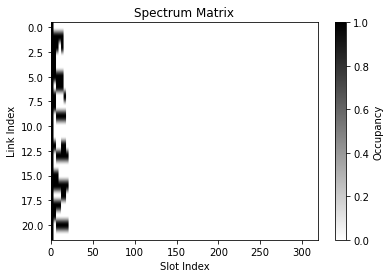

In [10]:
import matplotlib.pyplot as plt

print(spectrum_matrix)
def visualize_spectrum_matrix(spectrum_matrix):
    plt.imshow(spectrum_matrix, cmap='binary', aspect='auto')
    plt.xlabel('Slot Index')
    plt.ylabel('Link Index')
    plt.title('Spectrum Matrix')
    plt.colorbar(label='Occupancy')
    plt.show()

# Assuming 'spectrum_matrix' is your spectrum matrix
visualize_spectrum_matrix(spectrum_matrix)


In [13]:
def find_available_slots(spectrum_matrix, row_indices, num_slots_needed):
    num_rows = len(spectrum_matrix)
    num_cols = len(spectrum_matrix[0])
    
    for col in range(num_cols - num_slots_needed + 1):
        is_available = True
        
        # Check if all rows have consecutive zeros in the current column
        for row_index in row_indices:
            row = spectrum_matrix[row_index]
            if any(row[col + k] != 0 for k in range(num_slots_needed)):
                is_available = False
                break
        
        if is_available:
            return col
    
    return None  # Return None if no available slots are found
spectrum_matrix = [
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
]

row_indices = [0, 1, 2, 3]
num_slots_needed = 2

available_slot = find_available_slots(spectrum_matrix, row_indices, num_slots_needed)
print("Available slot index:", available_slot)


Available slot index: 3


In [15]:
spectrum_matrix=create_spectrum_matrix(topology_graph,num_spectrum_slots=320)
path=[2,4]
assign_spectrum_for_request(path,topology_graph,spectrum_matrix,'SC-DP-QPSK',link)
path=[2,3,5]
assign_spectrum_for_request(path,topology_graph,spectrum_matrix,'SC-DP-QPSK',link)
path=[2,3,6]
assign_spectrum_for_request(path,topology_graph,spectrum_matrix,'SC-DP-QPSK',link)

Assigned spectrum slots for path [2, 4] (Modulation: SC-DP-QPSK): 0 - 2
Assigned spectrum slots for path [2, 3, 5] (Modulation: SC-DP-QPSK): 0 - 2
Assigned spectrum slots for path [2, 3, 6] (Modulation: SC-DP-QPSK): 3 - 5


3

In [2]:
def break_down_path_to_links(path):
    links = []
    for i in range(len(path) - 1):
        link = (path[i], path[i + 1])
        links.append(link)
    return links

# Example usage:
path = [2, 3,5]
links = break_down_path_to_links(path)
print(links)  # Output: [(1, 3), (3, 4)]


[(2, 3), (3, 5)]


In [15]:


def find_corresponding_row(topology_graph, link):
    # Find the index of the link in the list of edges
    edges = list(topology_graph.edges())
    try:
        index = edges.index(link)
    except ValueError:
        # Reverse the link and try again (in case the order is different)
        reversed_link = (link[1], link[0])
        index = edges.index(reversed_link)+11
    return index
link = (4, 2)
link_index = find_corresponding_row(topology_graph, link)
print(link_index)

14


In [11]:
list(topology_graph.edges())

[(1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 7)]